# COGS 118A- Project Checkpoint

# Names

- Xiqiang Liu
- Lian Lumada
- Yikai Mao
- Mincheng Wang
- Hongzhang Shi


# Abstract 
The goal of this project is using machine learning algorithms to detect COVID-19 abnormalities from chest radiograph. The dataset contains 6,054 chest scan images with various resolutions, including information such as ages, genders, time of scan, etc. Each of scan is labelled in one of four categories: Negative for Pneumonia, Typical Appearance, Indeterminate Appearance, and Atypical Appearance. In this project, we use ResNet-34 Model to classify those chest radiograph data and identify their health status. After implementing the algorthims, we utilize the mean Average Precision (mAP) to examine the algorithm performance across multiple classes. 

# Background

Covid-19, the most severe epidemic disease in current years, influences billions of peoples’ lives around the world. One symptom of Covid-19 positive patients is the inflammation and fluid in the lungs caused by pulmonary infection. Instead of spending hours and days in using labotorary methods such as polymerase chain reaction to detect genetic material, detecting infection from chest radiograph can only take minutes <a name="kaggle"></a>[<sup>[1]</sup>](#kagglenote). The technique called radiomics is used to detect unidentifiable tumoral patterns from naked eyes, by extracting features from medical images using data-characterisation algorithms <a name="wiki"></a>[<sup>[2]</sup>](#wikinote). Some research shows that transfer learning from pre−trained CNNs can be used as a promising solution for diagnosis of coronavirus by transferring knowledge from generic object recognition tasks to domain-specific tasks. In addition, experiments also prove that a modification to ResNet50 with some new layers increases the diagnosis accuracy to 97.7% for Computerized Tomography dataset and 97.1% for X−Ray dataset which is superior compared to other approaches. <a name="ncbi"></a>[<sup>[3]</sup>](#ncbinote).

# Problem Statement

Many studies have shown that deep learning algorithms such as ResNet received a high accuracy for detection and diagnosis of COVID− 19 in chest X−Ray and Computerized Tomography images. The technique is cheap, accurate, and it can largely shorten the time for detecting COVID-19. For these reasons, our project objective is to identify COVID-19 abnormalities that may be detected from chest radiographs. For each of the radiograph images, there are  four labels `negative`/`typical`/`indeterminate`/`atypical` that are one-hot encoded, respectively they stand for negative for pneumonia, typical/indeterminate/atypical appearances. Our task is to use ResNet-34 model to classify the radiographs to the four classes, `negative`/`typical`/`indeterminate`/`atypical`. The performance is measured by the evaluation metrics and we aim to find the best ResNet model architecures for detection and diagnosis of COVID− 19.

# Data

We selected the <a name="kaggledata"></a>[SIIM-FISABIO-RSNA COVID-19 Detection](#kagglenote) dataset from Kaggle. The reason why we chose this dataset is because it contains the pairs of chest radiographs and the status of COVID-19 abnormalities. This allows us to explore the problem in a supervised setting.

The dataset contains 6,054 observations in DICOM format. For each observation, it consists of a chest scan with various resolutions, averaging $x$ pixels for each observation, and each pixel is in 12-bit grayscale, having $2^{12}=4096$ gray levels. Additionally, metadatas, such as age, time of scan, etc. were also included in the dataset. In terms of labels, there are four possible outcomes for every observation: Negative for Pneumonia, Typical Appearance, Indeterminate Appearance, and Atypical Appearance. They are listed in a separate csv file using one-hot encoding and indexed by the name of individual cases.

Although the original dataset also contained a test set, we do not plan to use it due to the lack of corresponding labels. Instead, a split of the training dataset will be used to evaluate our model.

Since the original dataset was presented in the form of DICOM files, we used the library `pydicom` to extract the pixel-level information out, along with all the metadata. To then reduce dimensionality, we decided to first represent the pixels in `uint8` (8-bit unsigned integer) by dividing each pixel by 16.
Since the original observations differ in dimensions, to better process the images, we then decided to resize all the images to the resolution $500\times500$ using the `resize` function in the `opencv-python` library.

# Proposed Solution

Since this is a rather straightforward image classification problem, we plan to use a standard ResNet-34<a name="resnet"></a>[<sup>[4]</sup>](#resnetnote) model for this project. This is because ResNet architectures have been proven to perform well on 2D image classification tasks. We plan to implement the model by ourselves using PyTorch. However, to ensure our implementation performs as expected, we will compare our performance with the standard implementation of ResNet-34 in the torchvision library, using the evaluation metrics listed below.

# Evaluation Metrics

To evaluate the performance of our model, we plan to use mean Average Precision (mAP) as our evaluation metric. In all of the formulas below, $TP$, $TN$, $FP$, and $FN$ denote True Positive, True Negative, False Positive, and False Negative, respectively.

First, we need to define Precision@k and Recall@k.

- Precision: Precision is defined as the proportion of true positives we hit out of all cases we predict positive: $$\mathrm{Precision} = \frac{TP}{TP+FP} $$
Precision@k is defined to be the precision value of the top-k observations sorted by predicted probability.

- Recall: Recall is defined as the proportion of true positive cases we hit out of all cases we predict as positive: $$\mathrm{Recall} = \frac{TP}{TP+FN} $$
Similarly, Recall@k is defined to be the recall value of the top-k observations sorted by predicted probability.

- Average Precision: After obtaining Precision and Recall values at several k, we could create a plot where the $x$-axis denotes recall value and the $y$-axis denotes the precision value. Average Precision is thereby defined as the area under the curve of the Precision-Recall curve. To numerically calculate this metric, we plan to use torchmetrics library.

- Mean Average Precision: All metrics above only apply to one prediction class. Since we have multiple prediction classes, we will take the average of all Average Precision values to get our mean Average Precision (mAP) metric, as mAP is able to reflect the performance of multi-class classification models effectively.

- Multi-class confusion matrix: As there are 4 classes to classify, it would also be intuitive if we also visualize the multi-class confusion matrix. Instead of outputting single value, there will be $4\times4=16$ values, respectively representing “actual class is `i`, predicted to be `j`”. This metric allows us to know which particular classes are more difficult to distinguish, instead of just knowing the overall performance. One major advantage of this metric is that we can work specifically with the classes that are difficult to distinguish.

# Preliminary results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
study_label = pd.read_csv('/content/drive/MyDrive/study_label.csv').iloc[:, 1:]
study_label.head()

id  Negative for Pneumonia  Typical Appearance  \
0  00086460a852_study                       0                   1   
1  000c9c05fd14_study                       0                   0   
2  00292f8c37bd_study                       1                   0   
3  005057b3f880_study                       1                   0   
4  0051d9b12e72_study                       0                   0   

   Indeterminate Appearance  Atypical Appearance Sex  
0                         0                    0   F  
1                         0                    1   M  
2                         0                    0   M  
3                         0                    0   F  
4                         0                    1   F

### Distribution of Abnormalities in the Dataset

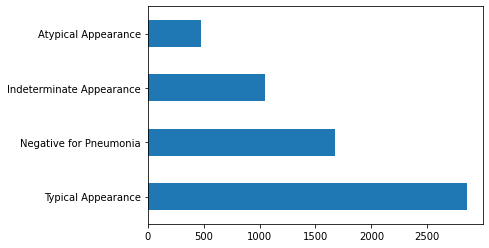

In [21]:
study_label.iloc[:, 1:-1].idxmax(axis=1).value_counts().plot.barh()
plt.show()

### % of Cases with Condition

In [24]:
study_label.iloc[:, 1:-1].mean(axis=0) * 100

Negative for Pneumonia      27.684176
Typical Appearance          47.158903
Indeterminate Appearance    17.327387
Atypical Appearance          7.829534
dtype: float64

### Distribution of Gender

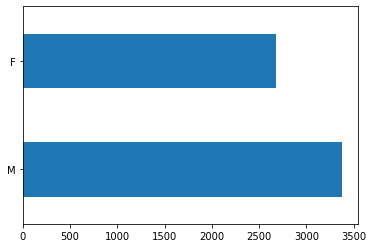

In [15]:
study_label['Sex'].value_counts().plot.barh()
plt.show()

### Sample Chest Scans

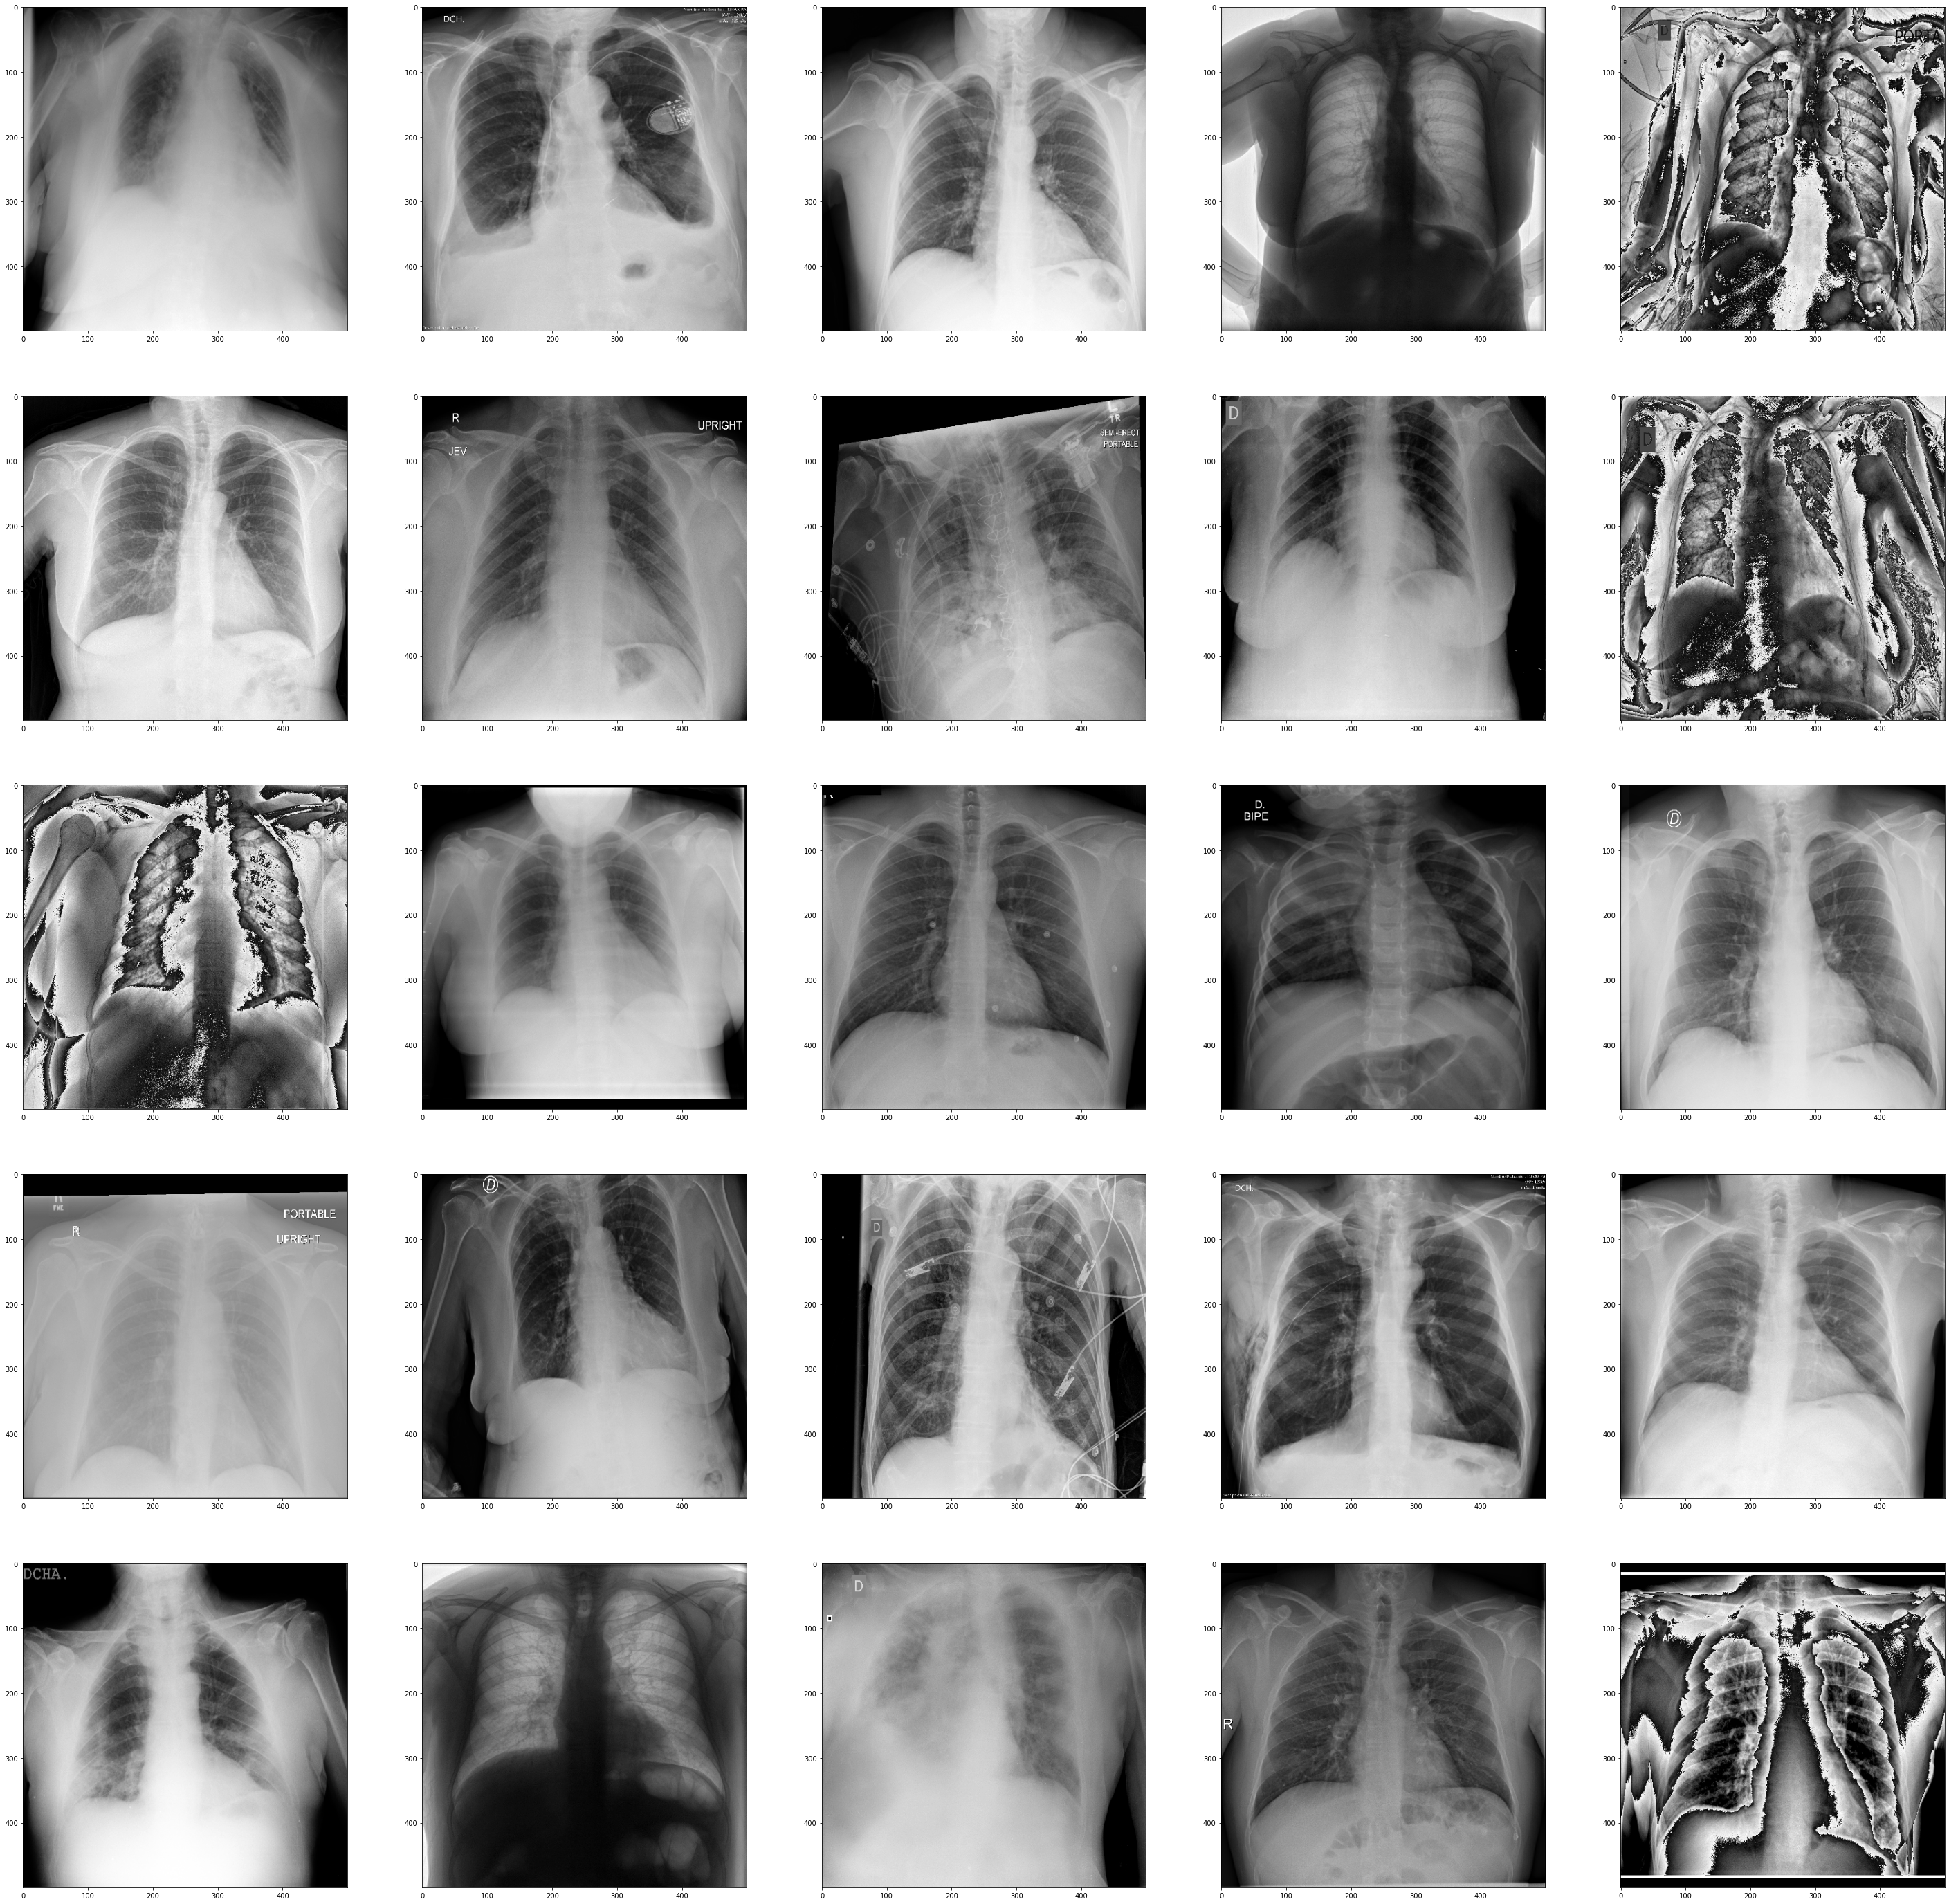

In [ ]:
import matplotlib.pyplot as plt
import h5py

from pathlib import Path

DATASET_ROOT = Path('data/siim-covid19-detection')
images = h5py.File(DATASET_ROOT / 'train_resized.hdf5', 'r')

fig, axes = plt.subplots(5,5, figsize=(50, 50))
axes = [item for sublist in axes for item in sublist]

for i, img in enumerate(images):
    if i > 24: break
    axes[i].imshow(images[img], cmap='gray')

# Ethics & Privacy

Since the dataset consists of chest radiographs and was reannotated for the Kaggle competition, only the patient's gender is recorded and other private information will not be revealed. 

Disclaimer: Our model cannot be used to identify covid-19 infection for medical uses. Its results should be verified with professionals to be reliable.

# Team Expectations 

* As a team, we will all communicate through discord, zoom and/or in person
* If conflict does arise, we will work things out by laying out our options and deciding together as a team the best way to resolve whatever conflict we are dealing with

* We will make decisions that work for each member of the team, meaning that we will meet when all, if not almost all members, can meet
* We all expect equal amounts of work put into the project from each team member. We understand that each member may be stronger in different aspects of the project, and that is something that we will work through together
* We will handle deadlines by sticking to our proposed timeline as well as we can

# Project Timeline Proposal




| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/24  |  7 PM |  Parts of Project proposal (all)  | Edit and turn in proposal | 
| 5/2  |  7 AM |  Import and wrangle data, do some data exploration and read up on literature for the project | Discuss wrangling and exploration finds | 
| 5/9  | 7 AM  | Read up on more literature and start individual EDA for project  | Discuss preliminary finds and create a solid plan for the rest of the project   |
| 5/16  | 7 PM  | More individual Eploratory Data Analysis | Discuss findings from individual EDA to focus on and what to turn in for check point  |
| 5/20  | 7 PM  | Complete individual parts for project check point | Finalize project checkpoint and turn in. Discuss individual responisilities moving foreward. |
| 5/30  | 7 PM  |Complete individual responsibilities. Drafting of the paper for the final project| Discuss parts and edit project together. Make sure we are all on the same page |
| 6/8  | Before 11:59 PM  | Final edits | Turn in Final Project  |

# Footnotes
<a name="kagglenote"></a>1.[^](#kaggle)[^](#kaggledata): https://www.kaggle.com/competitions/siim-covid19-detection/overview<br> 
<a name="wikinote"></a>2.[^](#wiki): https://en.wikipedia.org/wiki/Radiomics<br>
<a name="ncbinote"></a>3.[^](#ncbi): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8095476/<br>
<a name="resnetnote"></a>4.[^](#resnet): https://arxiv.org/abs/1512.03385